In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [29]:
def eulerAnglesToRotationMatrix(theta):
    R_x = np.array([[1, 0, 0],
                    [0, math.cos(theta[0]), -math.sin(theta[0])],
                    [0, math.sin(theta[0]), math.cos(theta[0])]
                    ])

    R_y = np.array([[math.cos(theta[1]), 0, math.sin(theta[1])],
                    [0, 1, 0],
                    [-math.sin(theta[1]), 0, math.cos(theta[1])]
                    ])

    R_z = np.array([[math.cos(theta[2]), -math.sin(theta[2]), 0],
                    [math.sin(theta[2]), math.cos(theta[2]), 0],
                    [0, 0, 1]
                    ])

    R = np.dot(R_z, np.dot(R_y, R_x))

    return R

def gradtorad(listx) :
    listy = [0,0,0]
    listy[0] = (listx[0]/180)*math.pi
    listy[1] = (listx[1] / 180) * math.pi
    listy[2] = (listx[2] / 180) * math.pi
    return listy

def radtograd(listx) :
    listy = [0,0,0]
    listy[0] = (listx[0]/math.pi)*180
    listy[1] = (listx[1]/math.pi)*180
    listy[2] = (listx[2]/math.pi)*180
    return listy

def MatrixXCoordinates(matrix, coo):
    x = [sum([i * coo[num] for num, i in enumerate(row)]) for row in matrix]
    return x

# def MatrixXVector(matrix, vector):

In [3]:
df_cleaned = pd.read_csv('/data/ortho/Cat3_pat22_meting1_oef4.csv', header=None)

df_cleaned = df_cleaned.rename(columns={0: "thorax_r_x", 1: "thorax_r_y", 2: "thorax_r_z"})
df_cleaned = df_cleaned.rename(columns={3: "clavicula_r_x", 4: "clavicula_r_y", 5: "clavicula_r_z"})
df_cleaned = df_cleaned.rename(columns={6: "scapula_r_x", 7: "scapula_r_y", 8: "scapula_r_z"})
df_cleaned = df_cleaned.rename(columns={9: "humerus_r_x", 10: "humerus_r_y", 11: "humerus_r_z"})
df_cleaned = df_cleaned.rename(columns={12: "ellebooghoek_r"})
df_cleaned = df_cleaned.rename(columns={15: "thorax_l_x", 16: "thorax_l_y", 17: "thorax_l_z"})
df_cleaned = df_cleaned.rename(columns={18: "clavicula_l_x", 19: "clavicula_l_y", 20: "clavicula_l_z"})
df_cleaned = df_cleaned.rename(columns={21: "scapula_l_x", 22: "scapula_l_y", 23: "scapula_l_z"})
df_cleaned = df_cleaned.rename(columns={24: "humerus_l_x", 25: "humerus_l_y", 26: "humerus_l_z"})
df_cleaned = df_cleaned.rename(columns={27: "ellebooghoek_l"})

In [16]:
theta = df_cleaned[['clavicula_r_x','clavicula_r_y','clavicula_r_z']]
print(df_cleaned[['clavicula_r_x','clavicula_r_y','clavicula_r_z']].head())

   clavicula_r_x  clavicula_r_y  clavicula_r_z
0     -26.562582       6.545926       1.603335
1     -27.027290       6.582132       3.193062
2     -26.805165       6.438310       1.957670
3     -26.867336       6.703879       2.832869
4     -27.491750       6.387699       3.853660


In [33]:
data = theta.iloc[0].tolist()
test = eulerAnglesToRotationMatrix(data)
print(data)
print(test)
print(test*[0,0,-5])
xrot = eulerAnglesToRotationMatrix([data[0],0,0])

print(xrot)
print(MatrixXCoordinates(test,[0,0,-5]))

[-26.56258188821282, 6.545926246469582, 1.603334827571602]
[[-0.03141629 -0.13204912 -0.9907452 ]
 [ 0.96517054 -0.26158685  0.00425966]
 [-0.2597284  -0.95610426  0.13566801]]
[[-0.         -0.          4.95372599]
 [ 0.         -0.         -0.02129829]
 [-0.         -0.         -0.67834006]]
[[ 1.          0.          0.        ]
 [ 0.          0.14048937  0.99008219]
 [ 0.         -0.99008219  0.14048937]]
[4.9537259858024116, -0.021298291366359263, -0.67834006248400069]


In [6]:
def DrawPlot(Start, End):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot([Start[0],End[0]],[Start[1],End[1]],[Start[2],End[2]],c='r')
    ax.set_zlim(-5,5)
    ax.set_ylim(-5,5)
    ax.set_xlim(-5,5)
    plt.show()
    return

In [7]:
def CalculateLength(Point1, Point2):
    # Point2 & Point2 are lists, filled like: [x,y,z]
    # https://math.stackexchange.com/questions/42640/calculate-distance-in-3d-space
    XLength = abs(Point1[0] - Point2[0])
    YLength = abs(Point1[1] - Point2[1])
    ZLength = abs(Point1[2] - Point2[2])
    Distance = math.sqrt((XLength ** 2) + (YLength ** 2) + (ZLength ** 2))
    return Distance

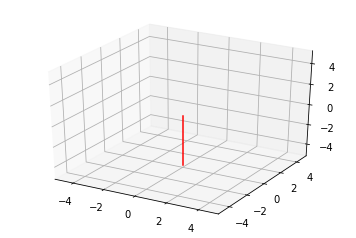

Lengte: 5.0
Angle deg: -26.56258188821282 	 Angle rad: -0.46360451177992607
chord: -2.2973194833068558
BaseAngle: 76.71870905589358
LegToBase: 2.2257245390024245
PartLeg: 0.569058068094746
[ 0.  0. -5.]
[ 2.22572454  0.         -4.43094193]


In [14]:
startingpoint = np.array([0,0,0])
length = -5.0000000
EndPoint = startingpoint + np.array([0,0,length])
DrawPlot(startingpoint, EndPoint)
print('Lengte: %s'%CalculateLength(startingpoint, EndPoint))
Angle = theta.iloc[0].tolist()[0]

# Calculate chord 
# https://math.stackexchange.com/questions/1128457/find-the-length-of-the-chord-given-that-the-circles-diameter-and-the-subtended
# Expecting angles in euler angles
chord = 2 * length * math.sin(math.radians(abs(Angle))/2)

# Calculate base angles of isosceles triangle
# https://www.google.nl/url?sa=i&rct=j&q=&esrc=s&source=images&cd=&cad=rja&uact=8&ved=2ahUKEwiRrcjEkd7dAhUlPewKHTe-CnMQjRx6BAgBEAU&url=https%3A%2F%2Fbrilliant.org%2Fwiki%2Fproperties-of-isosceles-triangles%2F&psig=AOvVaw3yU1-e1KyZfK_FuWhadcUk&ust=1538239064945294
BaseAngle = (180 - abs(Angle)) / 2

# Calculate length leg to base angle line
# https://www.mathsisfun.com/algebra/trig-solving-asa-triangles.html
LegToBase = math.sin(BaseAngle)* abs(chord)
PartLeg = math.cos(BaseAngle) * abs(chord)


# print('Pythagoras: %s' % math.sqrt(LegToBase ** 2 + PartLeg ** 2)) # Controle calculation
EndPoint = EndPoint + np.array([LegToBase, 0, PartLeg])


StartPoint: [0 0 0] 	 EndPoint: [0.0, -4.950410936295883, -0.7024468391288534]
Rotation: -26.56258188821282
Lengte: 5.0


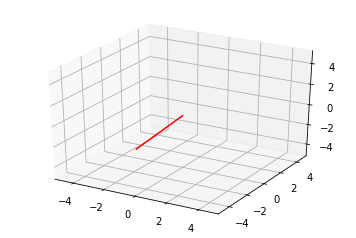

In [32]:
print('StartPoint: %s \t EndPoint: %s' % (startingpoint, [0.0, -4.9504109362958832, -0.70244683912885342]))
print('Rotation: %s' % Angle)
print('Lengte: %s'%CalculateLength(startingpoint, [0.0, -4.9504109362958832, -0.70244683912885342]))
DrawPlot(startingpoint, [0.0, -4.9504109362958832, -0.70244683912885342])

In [10]:
# print(df_cleaned.iloc[0])

![Variables](https://i.imgur.com/MUc4BYf.png "Variable Names explained")

In [11]:
startingpoint = np.array([0,0,0])
length = -5
EndPoint = startingpoint + np.array([0,0,length])